In [2]:
%matplotlib inline

# Drawing a histogram

## Import data

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import phjGenerateExampleData

In [4]:
phjTempDF = phjGenerateExampleData.phjPandasDF9()

In [5]:
print("Head")
print(phjTempDF.head(3))
print("\nTail")
print(phjTempDF.tail(3))
print("\n")
print(phjTempDF.dtypes)

Head
        date  outcome  random_normal
0 2013-01-01        1       2.837028
1 2013-01-02        1       4.991143
2 2013-01-03        0       3.536247

Tail
           date  outcome  random_normal
1092 2015-12-29        1       4.212866
1093 2015-12-30        1       5.005712
1094 2015-12-31        1       6.297138


date             datetime64[ns]
outcome                   int64
random_normal           float64
dtype: object


In [6]:
phjTempDF['date'] = pd.to_datetime(phjTempDF['date'])

## Draw histogram

### Drawing the basic histogram

#### Method 1 – Directly from Pandas Dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1067e48d0>]], dtype=object)

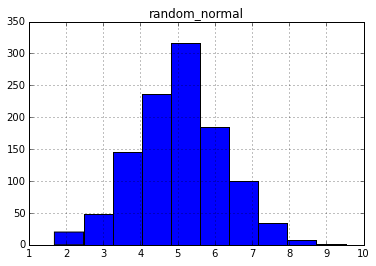

In [7]:
phjTempDF.hist('random_normal')

#### Method 2 – Using PyPlot

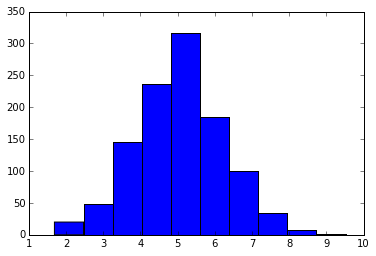

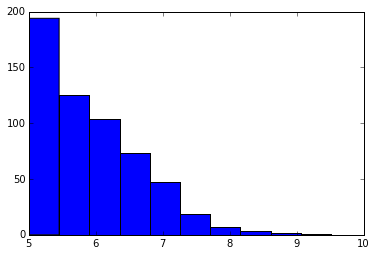

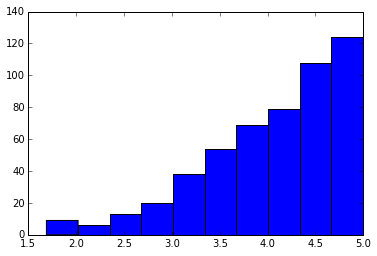

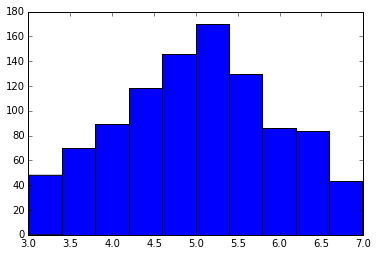

In [15]:
plt.figure(1)    # Optional. Will be created automatically if don't specify axes.
plt.subplot(111) # Optional. Will be created automatically if don't specicy axes.
n, bins, patches = plt.hist(phjTempDF['random_normal'])
plt.show()

# A slight word of warning. It seems that trying to draw a histogram using
# a sliced and diced dataframe can be problematic because the index is not
# a continuous series and this generates an error (keyerror = 0, I think).
# Anyway, the way around that is to:
# i.   Reset the index. This creates a new index and puts the old index as a new column.
# ii.  Then drop that column containing the old index (I suppose this isn't strictly necessary).
# iii. Plot the histogram, explicitly naming the column with the data.
#
# Although, perhaps the best way is to access the. values property.
#
# So, for example, to draw a histogram of only those values that are above 5, the
# following will fail:
#
# plt.figure(1)
# plt.subplot(111)
# n,bins,patches = plt.hist(phjTempDF.loc[phjTempDF['random_normal'] > 5,'random_normal'])
# plt.show()
#
# But the following will work:

plt.figure(1)
plt.subplot(111)
dataToPlot = phjTempDF.loc[phjTempDF['random_normal'] > 5,'random_normal']
dataToPlot = dataToPlot.reset_index()
dataToPlot = dataToPlot.drop('index', axis=1)
n,bins,patches = plt.hist(dataToPlot['random_normal'])
plt.show()

# But this is probably even better!
plt.figure(1)
plt.subplot(111)
n,bins,patches = plt.hist(phjTempDF.loc[phjTempDF['random_normal'] <= 5,'random_normal'].values)
plt.show()

# And another issue
# =================
# If there are any NaN values in the series to be plotted, it results in:
#
#    AttributeError: max must be larger than min in range parameter.
#
# To avoid problems, use the dropna() function to remove NaNs from the series. For example:

plt.figure(1)
plt.subplot(111)
n,bins,patches = plt.hist(phjTempDF.loc[(phjTempDF['random_normal'] <= 7) & (phjTempDF['random_normal'] > 3),'random_normal'].dropna().values)
plt.show()

#### Method 3

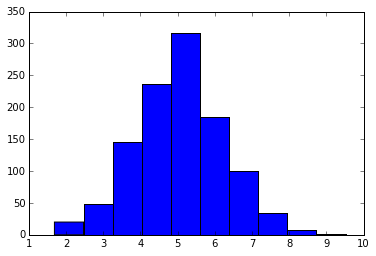

In [11]:
fig = plt.figure()    # Returns a Figure where we can add one or more Axes instances
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(phjTempDF['random_normal'])
plt.show()

### Adding some bling – titles and labels

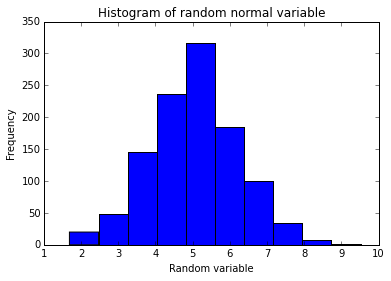

In [12]:
plt.figure(1)    # Optional. Will be created automatically if don't specify axes.
plt.subplot(111) # Optional. Will be created automatically if don't specify axes.
n, bins, patches = plt.hist(phjTempDF['random_normal'])

# Add some titles and labels
plt.title("Histogram of random normal variable")
plt.xlabel("Random variable")
plt.ylabel("Frequency")

plt.show()

# Alternatively, could use:
# fig = plt.figure()    # Returns a Figure where we can add one or more Axes instances
# ax = fig.add_subplot(1,1,1)
# n, bins, patches = ax.hist(tempDF['random_normal'])
# ax.set_title("Histogram of random normal variable")
# ax.set_xlabel("Random variable")
# ax.set_ylabel("Frequency")
# plt.show()

### Adding a nomal distribution line of best fit

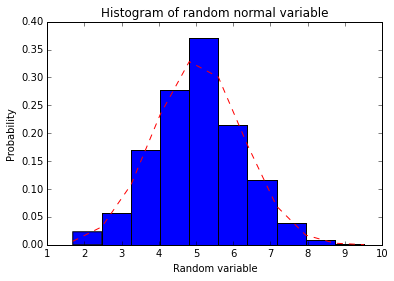

In [13]:
import matplotlib.mlab as mlab

plt.figure(1)    # First figure. Optional. Will be created automatically if don't specify axes.
plt.subplot(111) # First (and in this case, only) subplot in the first figure. Optional. Will be created automatically if don't specicy axes.
n, bins, patches = plt.hist(phjTempDF['random_normal'],normed=1)    # Need to display as probability

# Add some titles and labels
plt.title("Histogram of random normal variable")
plt.xlabel("Random variable")
plt.ylabel("Probability")    # Needed to change y axis label to reflect that probability is plotted.

# Add a normal distribution
mu = phjTempDF['random_normal'].mean()
sigma = phjTempDF['random_normal'].std()

y = mlab.normpdf(bins,mu,sigma)
plt.plot(bins,y,'r--')

plt.show()

## Plot relative frequency

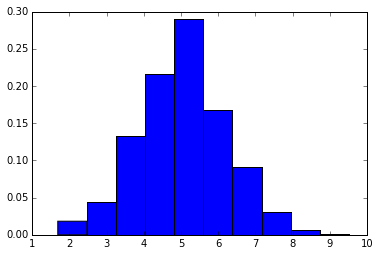

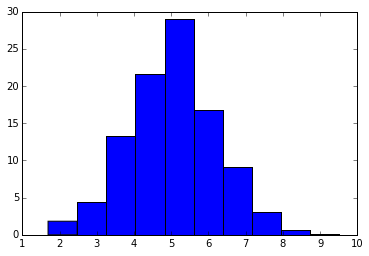

In [28]:
# Plot relative frequency, use the following structure:
#
#    ax.hist(mydata, weights=np.zeros_like(data) + 1. / data.size)

plt.figure(1)
plt.subplot(111)
n,bins,patches = plt.hist(phjTempDF['random_normal'].dropna().values,
                         weights=np.zeros_like(phjTempDF['random_normal'].dropna().values) + 1. / phjTempDF['random_normal'].dropna().values.size)
plt.show()


# Or as percentages...
plt.figure(1)
plt.subplot(111)
n,bins,patches = plt.hist(phjTempDF['random_normal'].dropna().values,
                         weights=np.zeros_like(phjTempDF['random_normal'].dropna().values) + 100. / phjTempDF['random_normal'].dropna().values.size)
plt.show()

## The effect of using different bin sizes

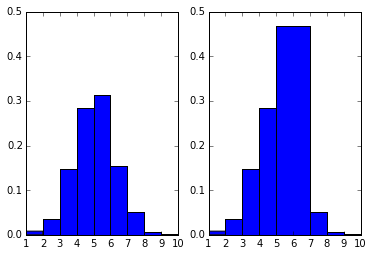

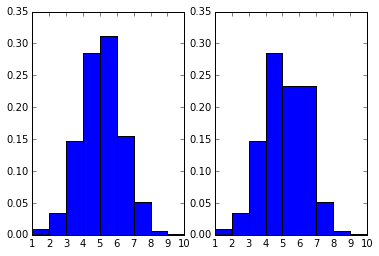

In [40]:
# If different bin widths are used, the frequency is the total for the bin rather than being adjusted for area
plt.figure(1)
ax1 = plt.subplot(121)
n,bins,patches = plt.hist(phjTempDF['random_normal'].dropna().values,
                         weights=np.zeros_like(phjTempDF['random_normal'].dropna().values) + 1. / phjTempDF['random_normal'].dropna().values.size,
                         bins=[1,2,3,4,5,6,7,8,9,10])
ax2 = plt.subplot(122, sharey=ax1)
n,bins,patches = plt.hist(phjTempDF['random_normal'].dropna().values,
                         weights=np.zeros_like(phjTempDF['random_normal'].dropna().values) + 1. / phjTempDF['random_normal'].dropna().values.size,
                         bins=[1,2,3,4,5,7,8,9,10])

plt.show()

# Use normed=1 to adjust for bin widths. But then can't plot relative frequency.
plt.figure(1)
ax1 = plt.subplot(121)
n,bins,patches = plt.hist(phjTempDF['random_normal'].dropna().values,
                         normed=1,
                         bins=[1,2,3,4,5,6,7,8,9,10])

ax2 = plt.subplot(122, sharey=ax1)
n,bins,patches = plt.hist(phjTempDF['random_normal'].dropna().values,
                         normed=1,
                         bins=[1,2,3,4,5,7,8,9,10])

plt.show()